** Muhammad Talha Iftikhar Bese 28A Lab 4*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
df_train = pd.read_csv("/content/mobile_price_classification_train.csv")

In [ ]:
df_train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
X = df_train.drop(columns=["price_range"],axis=1)
y = df_train["price_range"]

In [ ]:
chi_selector = SelectKBest(score_func=chi2,k=10)
X_kbest = chi_selector.fit_transform(X,y)

In [ ]:
selected_features_chi2 = X.columns[chi_selector.get_support()]
print("top 10",list(selected_features_chi2))

top 10 ['battery_power', 'fc', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

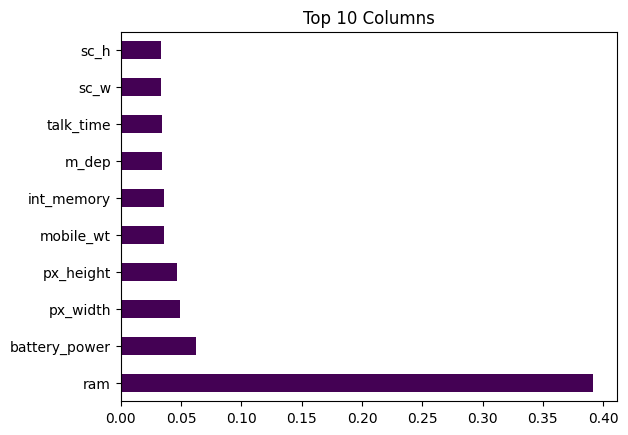

In [ ]:
feature_importance = pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(10).plot(kind="barh", colormap="viridis")
plt.title("Top 10 Columns")
plt.show()

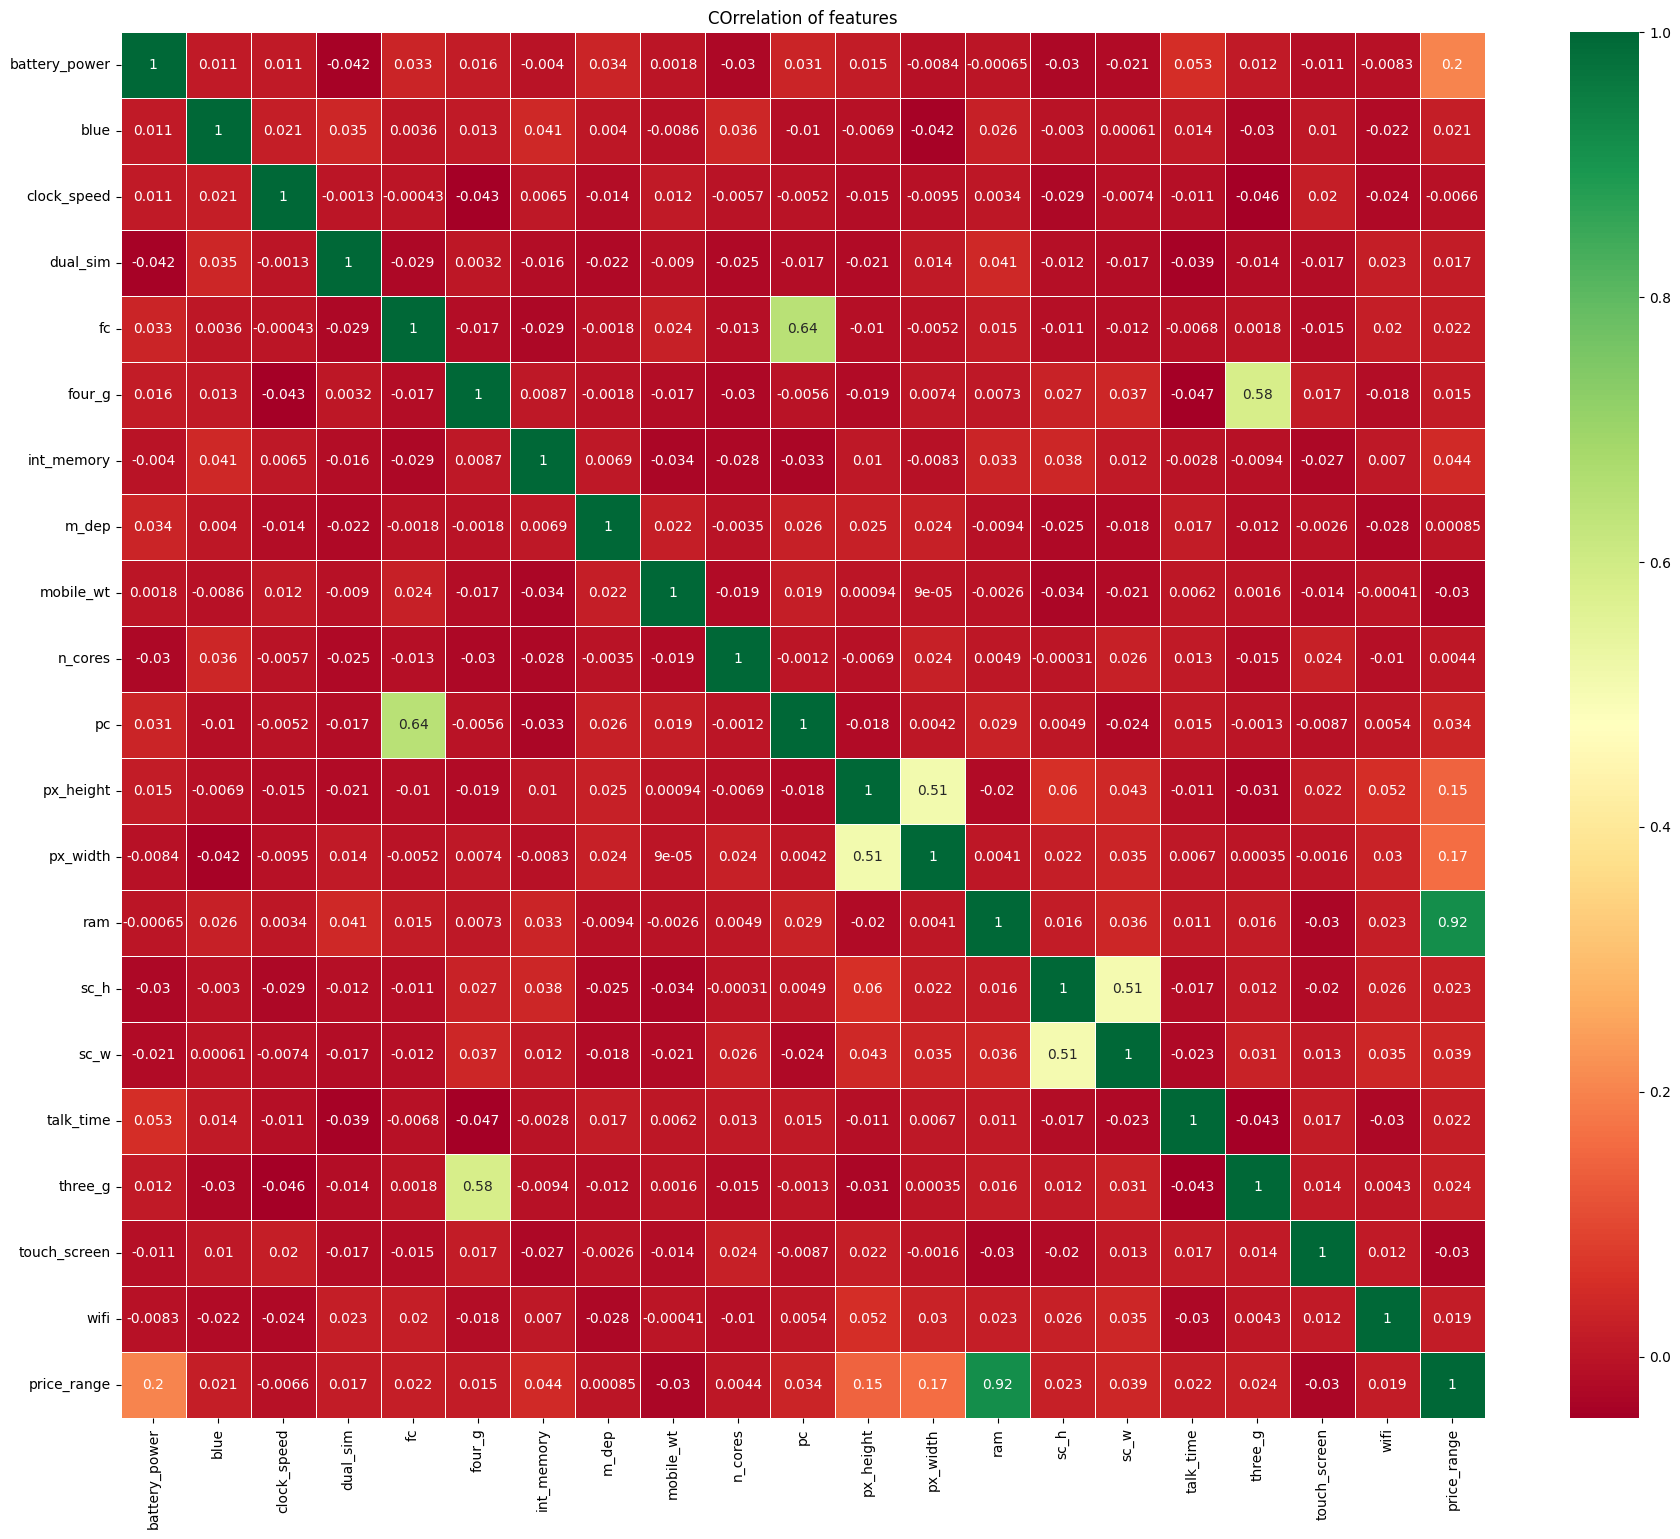

In [ ]:
plt.figure(figsize=(22,18))
corrmat = df_train.corr()
sns.heatmap(corrmat, annot=True, cmap="RdYlGn", linewidths = 0.5)
plt.title("COrrelation of features")
plt.show()

In [ ]:
print("Correlation with TARGET VARIABLE :")
print(corrmat['price_range'].sort_values(ascending=False))

Correlation with TARGET VARIABLE :
price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64
